# This is Nicole's Week 4 assignment

For this assignment, I'm hoping to practice and improve my skills from previous labs. I'm going to work with a new dataset that has the locations of all the BART stations in California (but it also has all train stations in California, so I'm going to have to slim down this data a ton). I'm hoping to create a map that shows the specific stations we are going to focus on for our final project. At some point, I can merge this map with the other maps we created, such as the map that shows ethnic demographics for different census blocks in Alameda County. 

Guess we'll see how this goes!

First, I'm going to start by importing some important libraries.

In [2]:
import osmnx as ox # this is for open street network analysis
import pandas as pd # this is for regular data analysis
import geopandas as gpd # this is for geospatial analysis
import contextily as ctx # this is for basemaps
import matplotlib.pyplot as plt # this is for plotting
import networkx as nx # this is for network analysis


/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


Everything loaded nicely. Now I'm going to start importing my data and exploring it.

In [3]:
bart = gpd.read_file('California_Rail_Stations.geojson')
bart.head()

,OBJECTID,LOCATION,STATION,CODE,ADDRESS,ZIP,PASS_OP,PASS_NETWO,COMM_OP,COMM_NETWO,BUS_ROUTES,TRANSIT,AIRPORT,STATION_TY,INTERMODAL,DIST,CO,geometry
0,1,Parking Garage,MONTEREY - Parking Garage,-,"Tyler, between Del Monte & Franklin",93940,,,,,55,,,2,0,5,MON,POINT (-121.89330 36.60033)
1,2,El Segundo,EL SEGUNDO,ESG,700 South Douglas Street,90245,,,,,1c,,,2,0,7,LA,POINT (-118.38342 33.90512)
2,3,Morgan Hill,MORGAN HILL,MHC,17200 Depot Street,95037,,,PCJPB,Caltrain,55,,,3,1,4,SCL,POINT (-121.65053 37.12966)
3,4,Amtrak Station,OAKLAND COLISEUM,OAC,700 Seventy-third Avenue,94621,Amtrak,Capitol Corridor,,,,"AC Transit,BART",AirBART connector to OAK,6,1,4,ALA,POINT (-122.19820 37.75252)
4,5,Amtrak Station,SANTA BARBARA,SBA,209 State Street,93101,Amtrak,"Coast Starlight,Pacific Surfliner",,,"4,10,17,21",Santa Barbara MTD,,5,1,5,SB,POINT (-119.69260 34.41430)


In [4]:
# getting the list of column names
bart.columns.to_list()

['OBJECTID',
 'LOCATION',
 'STATION',
 'CODE',
 'ADDRESS',
 'ZIP',
 'PASS_OP',
 'PASS_NETWO',
 'COMM_OP',
 'COMM_NETWO',
 'BUS_ROUTES',
 'TRANSIT',
 'AIRPORT',
 'STATION_TY',
 'INTERMODAL',
 'DIST',
 'CO',
 'geometry']

In [5]:
# getting information about the dataset
bart.info

<bound method DataFrame.info of      OBJECTID        LOCATION                       STATION CODE  \
0           1  Parking Garage     MONTEREY - Parking Garage    -   
1           2      El Segundo                    EL SEGUNDO  ESG   
2           3     Morgan Hill                   MORGAN HILL  MHC   
3           4  Amtrak Station              OAKLAND COLISEUM  OAC   
4           5  Amtrak Station                 SANTA BARBARA  SBA   
..        ...             ...                           ...  ...   
287       288                                        Rialto        
288       289                                    Buena Park        
289       290                             North Main Corona        
290       291                  Laguna Niguel/ Mission Viejo        
291       292                                  San Clemente        

                                 ADDRESS    ZIP PASS_OP  \
0    Tyler, between Del Monte & Franklin  93940           
1               700 South Douglas

In [6]:
income = gpd.read_file('acs2019_5yr_B19001_14000US06001432502.geojson')
income.head()

,geoid,name,B19001001,"B19001001, Error",B19001002,"B19001002, Error",B19001003,"B19001003, Error",B19001004,"B19001004, Error",...,"B19001013, Error",B19001014,"B19001014, Error",B19001015,"B19001015, Error",B19001016,"B19001016, Error",B19001017,"B19001017, Error",geometry
0,05000US06001,"Alameda County, CA",577177.0,1744.0,23592.0,1012.0,20319.0,908.0,15096.0,817.0,...,1561.0,57311.0,1414.0,47160.0,1089.0,70852.0,1824.0,111951.0,1893.0,"MULTIPOLYGON (((-122.28088 37.70723, -122.2817..."
1,14000US06001400100,"Census Tract 4001, Alameda, CA",1293.0,56.0,10.0,17.0,7.0,11.0,43.0,41.0,...,42.0,68.0,36.0,64.0,43.0,96.0,44.0,710.0,96.0,"MULTIPOLYGON (((-122.24692 37.88544, -122.2466..."
2,14000US06001400200,"Census Tract 4002, Alameda, CA",847.0,51.0,5.0,7.0,5.0,8.0,0.0,12.0,...,38.0,100.0,38.0,19.0,16.0,130.0,44.0,390.0,56.0,"MULTIPOLYGON (((-122.25792 37.84261, -122.2577..."
3,14000US06001400300,"Census Tract 4003, Alameda, CA",2441.0,134.0,101.0,98.0,87.0,91.0,30.0,35.0,...,110.0,133.0,72.0,78.0,49.0,373.0,122.0,732.0,130.0,"MULTIPOLYGON (((-122.26563 37.83764, -122.2655..."
4,14000US06001400400,"Census Tract 4004, Alameda, CA",1802.0,97.0,48.0,33.0,48.0,57.0,78.0,60.0,...,78.0,116.0,51.0,312.0,106.0,148.0,57.0,506.0,119.0,"MULTIPOLYGON (((-122.26183 37.84162, -122.2618..."


Now I want to see what my dataset looks like visually. It won't look like much but I'm curious what will show up. 

<AxesSubplot:>

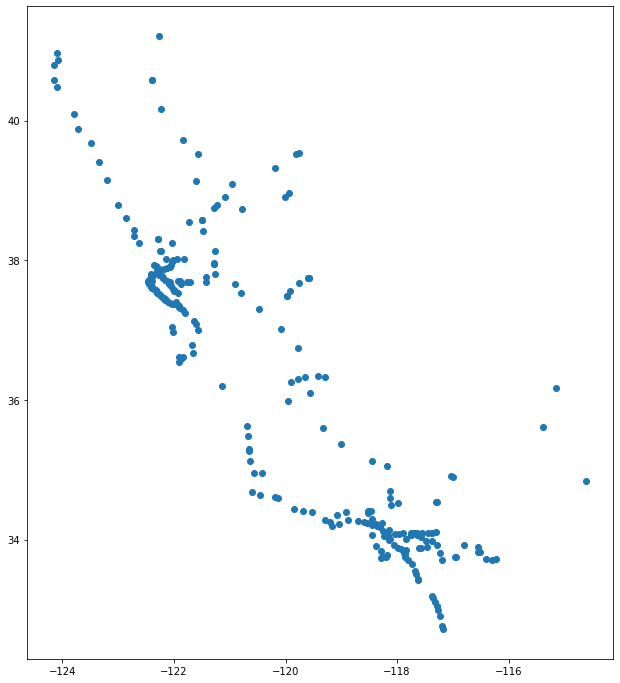

In [7]:
bart.plot(figsize=(12,12)) 

<AxesSubplot:>

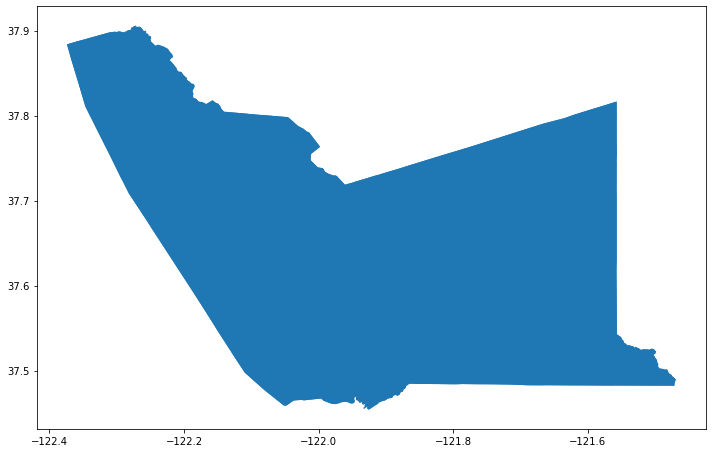

In [8]:
income.plot(figsize=(12,12))

I'm going to cut down the bart data because it includes every train stop in California and I only want to focus on BART stations in Alameda County. I'll do this by making a "columns to keep" variable and then updating the bart variable with only the variables I want to keep. 

In [9]:
bart.info

<bound method DataFrame.info of      OBJECTID        LOCATION                       STATION CODE  \
0           1  Parking Garage     MONTEREY - Parking Garage    -   
1           2      El Segundo                    EL SEGUNDO  ESG   
2           3     Morgan Hill                   MORGAN HILL  MHC   
3           4  Amtrak Station              OAKLAND COLISEUM  OAC   
4           5  Amtrak Station                 SANTA BARBARA  SBA   
..        ...             ...                           ...  ...   
287       288                                        Rialto        
288       289                                    Buena Park        
289       290                             North Main Corona        
290       291                  Laguna Niguel/ Mission Viejo        
291       292                                  San Clemente        

                                 ADDRESS    ZIP PASS_OP  \
0    Tyler, between Del Monte & Franklin  93940           
1               700 South Douglas

In [10]:
bart.columns.to_list()

['OBJECTID',
 'LOCATION',
 'STATION',
 'CODE',
 'ADDRESS',
 'ZIP',
 'PASS_OP',
 'PASS_NETWO',
 'COMM_OP',
 'COMM_NETWO',
 'BUS_ROUTES',
 'TRANSIT',
 'AIRPORT',
 'STATION_TY',
 'INTERMODAL',
 'DIST',
 'CO',
 'geometry']

In [12]:
bart.head()

,OBJECTID,LOCATION,STATION,CODE,ADDRESS,ZIP,PASS_OP,PASS_NETWO,COMM_OP,COMM_NETWO,BUS_ROUTES,TRANSIT,AIRPORT,STATION_TY,INTERMODAL,DIST,CO,geometry
0,1,Parking Garage,MONTEREY - Parking Garage,-,"Tyler, between Del Monte & Franklin",93940,,,,,55,,,2,0,5,MON,POINT (-121.89330 36.60033)
1,2,El Segundo,EL SEGUNDO,ESG,700 South Douglas Street,90245,,,,,1c,,,2,0,7,LA,POINT (-118.38342 33.90512)
2,3,Morgan Hill,MORGAN HILL,MHC,17200 Depot Street,95037,,,PCJPB,Caltrain,55,,,3,1,4,SCL,POINT (-121.65053 37.12966)
3,4,Amtrak Station,OAKLAND COLISEUM,OAC,700 Seventy-third Avenue,94621,Amtrak,Capitol Corridor,,,,"AC Transit,BART",AirBART connector to OAK,6,1,4,ALA,POINT (-122.19820 37.75252)
4,5,Amtrak Station,SANTA BARBARA,SBA,209 State Street,93101,Amtrak,"Coast Starlight,Pacific Surfliner",,,"4,10,17,21",Santa Barbara MTD,,5,1,5,SB,POINT (-119.69260 34.41430)


In [11]:
bart['COMM_NETWO'].value_counts() #going to get how many times BART comes up in this column

                                                                                                                                   144
BART                                                                                                                                43
Caltrain                                                                                                                            30
San Bernardino Line                                                                                                                 11
ACE                                                                                                                                  9
Ventura County Line                                                                                                                  8
Inland Empire-Orange County Line,Orange County Line                                                                                  8
Antelope Valley Line                                   

In [12]:
bart['TRANSIT'].value_counts()

                                                   241
OCTA                                                 8
NCTD Breeze,San Diego MTS                            4
AC Transit                                           4
Santa Barbara MTD                                    2
San Joaquin RTD                                      2
Gold Coast Transit                                   2
Placer County Transit,Auburn Transit                 1
LAMTA Metro and buses,LADOT Transit-DASH             1
Chatsworth Metro Bus                                 1
Glendale Bee Line                                    1
Merced The Bus                                       1
Placer County Transit                                1
Roseville Transit                                    1
Kings Area Rural Transit                             1
Sacramento Regional Transit,Yolobus                  1
Lodi GrapeLine Transit                               1
San Luis Obispo RTA,SLO Transit                      1
Burbank Bu

In [13]:
bart['CO'].value_counts()

LA     38
ALA    30
SM     19
SCL    18
RIV    17
SF     17
SBD    13
CC     12
ORA    11
MON    11
SB      9
MPA     8
SD      8
VEN     8
SJ      7
HUM     6
KIN     5
SON     5
SLO     5
MEN     4
KER     4
        4
PLA     4
SAC     3
SOL     3
ED      3
SCR     2
NAP     2
TUL     2
STA     2
BUT     2
SHA     2
YUB     1
FRE     1
YOL     1
MAD     1
MER     1
NEV     1
TEH     1
SIS     1
Name: CO, dtype: int64

I wanted to check which columns would contain the best information to make sure I'm only going to get BART stops in Alameda County. I found that there are 30 stops in Alameda County and 43 BART stops in the Com Network column. This gives me a better idea of which columns to keep. Once I slim down the dataset to only have the columns I need, I can slim it down even more to only keep the relevant values. So now I'm going to get a list of the columns again so I don't have to keep scrolling up and then I'll create the new variable for columns to keep.

In [14]:
bart.columns.to_list()

['OBJECTID',
 'LOCATION',
 'STATION',
 'CODE',
 'ADDRESS',
 'ZIP',
 'PASS_OP',
 'PASS_NETWO',
 'COMM_OP',
 'COMM_NETWO',
 'BUS_ROUTES',
 'TRANSIT',
 'AIRPORT',
 'STATION_TY',
 'INTERMODAL',
 'DIST',
 'CO',
 'geometry']

In [16]:
columns_to_keep = ['OBJECTID',
                   'LOCATION',
                   'STATION',
                   'CODE',
                   'ADDRESS',
                   'ZIP',
                   'COMM_NETWO',
                   'STATION_TY',
                   'DIST',
                   'CO',
                   'geometry']

In [17]:
bart2 = bart[columns_to_keep] #I created a new variable bart2 just so the original dataset doesn't get changed completely
bart2.sample(15)

,OBJECTID,LOCATION,STATION,CODE,ADDRESS,ZIP,COMM_NETWO,STATION_TY,DIST,CO,geometry
141,142,Amtrak Station,NEEDLES,NDL,900 Front St.,92363,,1,8,SBD,POINT (-114.60644 34.84067)
91,92,Metrolink Station,LANCASTER,LCS,44812 N. Sierra Highway,93534,Antelope Valley Line,3,7,LA,POINT (-118.13613 34.69659)
197,198,,SUNNYVALE,,,0,Caltrain,1,4,SCL,POINT (-122.03142 37.37878)
5,6,Edge Water Transit Exchange,SEASIDE,SES,Playa Avenue and California Avenue,93955,,2,5,MON,POINT (-121.84348 36.61919)
98,99,Across from Visitor's Center,MARIPOSA,MRP,Hwy 140 at Hwy 49,95338,,2,10,MPA,POINT (-119.96622 37.48568)
215,216,,ROCKRIDGE,,,0,BART,1,4,ALA,POINT (-122.25178 37.84451)
37,38,Amtrak/Metrolink Station,MOORPARK,MPK,High St. at Moorpark Ave.,93021,Ventura County Line,5,7,VEN,POINT (-118.87782 34.28485)
170,171,ACE Station,PLEASANTON,PLS,4950 Pleasanton Avenue,94566,ACE,1,4,ALA,POINT (-121.88252 37.65866)
289,290,,North Main Corona,,,0,"91 Line,Inland Empire-Orange County Line",1,8,RIV,POINT (-117.56349 33.88209)
130,131,Palm Springs Airport,PALM SPRINGS,PSP,3400 Tahquitz Canyon Way,92262,,2,8,RIV,POINT (-116.51175 33.82323)


In [18]:
bart2 = bart2[bart2.CO == 'ALA']
bart2.sample(15)

,OBJECTID,LOCATION,STATION,CODE,ADDRESS,ZIP,COMM_NETWO,STATION_TY,DIST,CO,geometry
253,254,,WEST DUBLIN/PLEASANTON,,,0,BART,1,4,ALA,POINT (-121.92765 37.69988)
218,219,,WEST OAKLAND,,,0,BART,1,4,ALA,POINT (-122.29490 37.80458)
51,52,Amtrak Station,EMERYVILLE,EMY,5885 Horton St.,94608,,5,4,ALA,POINT (-122.29146 37.84053)
227,228,,SOUTH HAYWARD,,,0,BART,1,4,ALA,POINT (-122.05704 37.63448)
3,4,Amtrak Station,OAKLAND COLISEUM,OAC,700 Seventy-third Avenue,94621,,6,4,ALA,POINT (-122.19820 37.75252)
53,54,Across Mission Blvd. from Caltrans Park-n-Ride...,FREMONT/MISSION SAN JOSE,FRT,Upper Mission Blvd (Hwy 238) at I-680,94538,,2,4,ALA,POINT (-121.92382 37.53955)
47,48,Amtrak Station,FREMONT/CENTERVILLE,FMT,37260 Fremont Blvd. at Peralta Blvd.,94536,ACE,5,4,ALA,POINT (-122.00735 37.55890)
169,170,ACE Station,VASCO ROAD,VAS,575 South Vasco Road,94550,ACE,1,4,ALA,POINT (-121.71857 37.69701)
220,221,,LAKE MERRITT,,,0,BART,1,4,ALA,POINT (-122.26554 37.79768)
214,215,,ASHBY,,,0,BART,1,4,ALA,POINT (-122.27012 37.85321)


In [19]:
bart2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 30 entries, 3 to 253
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    30 non-null     int64   
 1   LOCATION    30 non-null     object  
 2   STATION     30 non-null     object  
 3   CODE        30 non-null     object  
 4   ADDRESS     30 non-null     object  
 5   ZIP         30 non-null     object  
 6   COMM_NETWO  30 non-null     object  
 7   STATION_TY  30 non-null     int64   
 8   DIST        30 non-null     int64   
 9   CO          30 non-null     object  
 10  geometry    30 non-null     geometry
dtypes: geometry(1), int64(3), object(7)
memory usage: 2.8+ KB


In [20]:
bart2['LOCATION'].value_counts()

                                                      19
Amtrak Station                                         6
ACE Station                                            2
LAVTA Transit Center                                   1
BART Station                                           1
Across Mission Blvd. from Caltrans Park-n-Ride Lot     1
Name: LOCATION, dtype: int64

In [21]:
bart2['COMM_NETWO'].value_counts()

BART    20
         6
ACE      4
Name: COMM_NETWO, dtype: int64

In [22]:
bart2['STATION'].value_counts()

HAYWARD                           2
OAKLAND COLISEUM                  1
MACARTHUR                         1
FREMONT                           1
UNION CITY                        1
SOUTH HAYWARD                     1
CASTRO VALLEY                     1
BAY FAIR                          1
SAN LEANDRO                       1
COLISEUM/OAKLAND AIRPORT (OAK)    1
FRUITVALE                         1
LAKE MERRITT                      1
12TH ST/OAKLAND CITY CENTER       1
WEST OAKLAND                      1
19TH STREET/OAKLAND               1
ROCKRIDGE                         1
BERKELEY                          1
ASHBY                             1
DOWNTOWN BERKELEY                 1
NORTH BERKELEY                    1
PLEASANTON                        1
VASCO ROAD                        1
FREMONT/MISSION SAN JOSE          1
DUBLIN/PLEASANTON                 1
EMERYVILLE                        1
OAKLAND                           1
LIVERMORE                         1
FREMONT/CENTERVILLE         

Chaithra and I picked a few stations to focus on sice they were the ones who had TOD projects completed. They are Fruitvale Transit Village (Fruitvale BART-Oakland), Hayward Bart Station (Hayward), MacArthur BART station (Oakland), South Hayward BART station (Hayward), Ashby BART station (Berkeley). I see that these stations are in this data which is great! I'm going to just pull up a quick little plot to see what my data looks like right now and then I can focus on the specific stations I need. 

<AxesSubplot:>

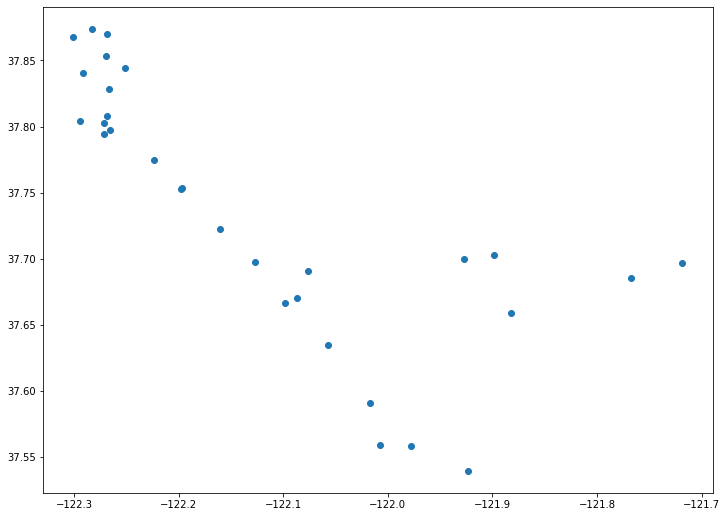

In [23]:
bart2.plot(figsize=(12,12))

In [24]:
bart2.sample(20)

,OBJECTID,LOCATION,STATION,CODE,ADDRESS,ZIP,COMM_NETWO,STATION_TY,DIST,CO,geometry
212,213,,NORTH BERKELEY,,,0,BART,1,4,ALA,POINT (-122.28335 37.87406)
219,220,,12TH ST/OAKLAND CITY CENTER,,,0,BART,1,4,ALA,POINT (-122.27196 37.80259)
169,170,ACE Station,VASCO ROAD,VAS,575 South Vasco Road,94550,ACE,1,4,ALA,POINT (-121.71857 37.69701)
220,221,,LAKE MERRITT,,,0,BART,1,4,ALA,POINT (-122.26554 37.79768)
214,215,,ASHBY,,,0,BART,1,4,ALA,POINT (-122.27012 37.85321)
226,227,,HAYWARD,,,0,BART,1,4,ALA,POINT (-122.08720 37.67012)
215,216,,ROCKRIDGE,,,0,BART,1,4,ALA,POINT (-122.25178 37.84451)
46,47,Amtrak Station,BERKELEY,BKY,University Ave. & 3rd St.,94710,,4,4,ALA,POINT (-122.30087 37.86742)
47,48,Amtrak Station,FREMONT/CENTERVILLE,FMT,37260 Fremont Blvd. at Peralta Blvd.,94536,ACE,5,4,ALA,POINT (-122.00735 37.55890)
225,226,,CASTRO VALLEY,,,0,BART,1,4,ALA,POINT (-122.07642 37.69072)


In [25]:
focus_stations = bart2.set_index("STATION") #this is to set the station names as the index so it is easier to delete the rows I don't need
focus_stations.head()

,OBJECTID,LOCATION,CODE,ADDRESS,ZIP,COMM_NETWO,STATION_TY,DIST,CO,geometry
STATION,,,,,,,,,,
OAKLAND COLISEUM,4,Amtrak Station,OAC,700 Seventy-third Avenue,94621,,6,4,ALA,POINT (-122.19820 37.75252)
BERKELEY,47,Amtrak Station,BKY,University Ave. & 3rd St.,94710,,4,4,ALA,POINT (-122.30087 37.86742)
FREMONT/CENTERVILLE,48,Amtrak Station,FMT,37260 Fremont Blvd. at Peralta Blvd.,94536,ACE,5,4,ALA,POINT (-122.00735 37.55890)
LIVERMORE,49,LAVTA Transit Center,LIV,2500 Railroad Ave. (near 1st St.),94550,ACE,3,4,ALA,POINT (-121.76750 37.68501)
OAKLAND,50,Amtrak Station,OKJ,245 2nd St.,94607,,5,4,ALA,POINT (-122.27148 37.79415)


In [26]:
focus_stations.info

<bound method DataFrame.info of                                 OBJECTID  \
STATION                                    
OAKLAND COLISEUM                       4   
BERKELEY                              47   
FREMONT/CENTERVILLE                   48   
LIVERMORE                             49   
OAKLAND                               50   
HAYWARD                               51   
EMERYVILLE                            52   
DUBLIN/PLEASANTON                     53   
FREMONT/MISSION SAN JOSE              54   
VASCO ROAD                           170   
PLEASANTON                           171   
NORTH BERKELEY                       213   
DOWNTOWN BERKELEY                    214   
ASHBY                                215   
ROCKRIDGE                            216   
MACARTHUR                            217   
19TH STREET/OAKLAND                  218   
WEST OAKLAND                         219   
12TH ST/OAKLAND CITY CENTER          220   
LAKE MERRITT                         221   


In [27]:
focus_stations.loc[['ASHBY', 'MACARTHUR', 'HAYWARD', 'SOUTH HAYWARD', 'FRUITVALE']]

,OBJECTID,LOCATION,CODE,ADDRESS,ZIP,COMM_NETWO,STATION_TY,DIST,CO,geometry
STATION,,,,,,,,,,
ASHBY,215,,,,0,BART,1,4,ALA,POINT (-122.27012 37.85321)
MACARTHUR,217,,,,0,BART,1,4,ALA,POINT (-122.26712 37.82871)
HAYWARD,51,Amtrak Station,HAY,"22555 Meekland Ave. at ""A"" St.",94545,,4,4,ALA,POINT (-122.09869 37.66666)
HAYWARD,227,,,,0,BART,1,4,ALA,POINT (-122.08720 37.67012)
SOUTH HAYWARD,228,,,,0,BART,1,4,ALA,POINT (-122.05704 37.63448)
FRUITVALE,222,,,,0,BART,1,4,ALA,POINT (-122.22420 37.77456)


In [28]:
focus_stations = focus_stations.loc[['ASHBY', 'MACARTHUR', 'HAYWARD', 'SOUTH HAYWARD', 'FRUITVALE']]
focus_stations.head()

,OBJECTID,LOCATION,CODE,ADDRESS,ZIP,COMM_NETWO,STATION_TY,DIST,CO,geometry
STATION,,,,,,,,,,
ASHBY,215,,,,0,BART,1,4,ALA,POINT (-122.27012 37.85321)
MACARTHUR,217,,,,0,BART,1,4,ALA,POINT (-122.26712 37.82871)
HAYWARD,51,Amtrak Station,HAY,"22555 Meekland Ave. at ""A"" St.",94545,,4,4,ALA,POINT (-122.09869 37.66666)
HAYWARD,227,,,,0,BART,1,4,ALA,POINT (-122.08720 37.67012)
SOUTH HAYWARD,228,,,,0,BART,1,4,ALA,POINT (-122.05704 37.63448)


Now I've reduced my dataset to only have the specific stations I need. However, I see there is a duplicate, so I'm going to delete that row.


In [29]:
focus_stations = focus_stations[focus_stations.COMM_NETWO == 'BART']
focus_stations.head()

,OBJECTID,LOCATION,CODE,ADDRESS,ZIP,COMM_NETWO,STATION_TY,DIST,CO,geometry
STATION,,,,,,,,,,
ASHBY,215,,,,0,BART,1,4,ALA,POINT (-122.27012 37.85321)
MACARTHUR,217,,,,0,BART,1,4,ALA,POINT (-122.26712 37.82871)
HAYWARD,227,,,,0,BART,1,4,ALA,POINT (-122.08720 37.67012)
SOUTH HAYWARD,228,,,,0,BART,1,4,ALA,POINT (-122.05704 37.63448)
FRUITVALE,222,,,,0,BART,1,4,ALA,POINT (-122.22420 37.77456)


Yay! I feel like that took forever, but practice makes improvement. Now I'm going to make a map with these stations.

<AxesSubplot:>

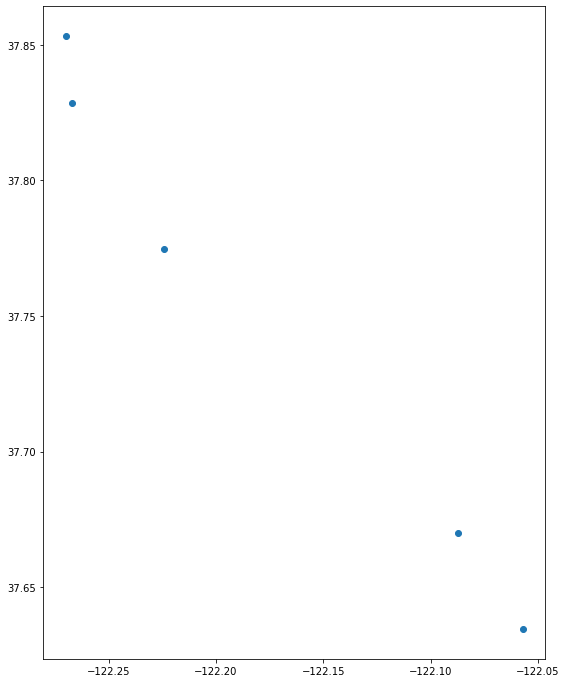

In [30]:
focus_stations.plot(figsize=(12,12))

In [31]:
focus_stations_web_mercator = focus_stations.to_crs(epsg=3857)

So the above command allowed me to reproject my data to the web mercator. Now I'm going to make a nicer looking map!

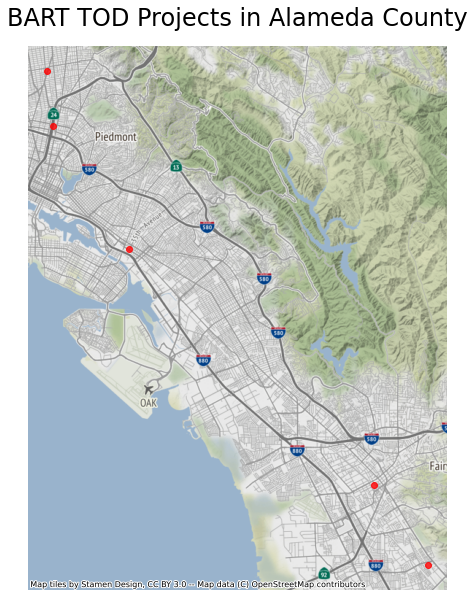

In [37]:
fig, ax = plt.subplots(figsize=(10, 10)) #using subplots makes it easier
#now I am adding the layer
focus_stations_web_mercator.plot(
    ax=ax, 
    color="red",
    alpha=0.8,
    legend=True
)
# turn the axis off
ax.axis('off')
# making a title
ax.set_title('BART TOD Projects in Alameda County',fontsize=24,pad=20)

#now I'm adding a basemap
ctx.add_basemap(ax)

There it is! I think it would be even better to create a legend so that we can see the names of the different stops, but for now I think this was helpful. I also didn't realize that if you take a break for a bit and you have to restart your server, you have to re-run all previous codes or else you'll keep getting error messages that your variables are not defined. Huge pain, but hey, I'm learning!